[*********************100%***********************]  3 of 3 completed


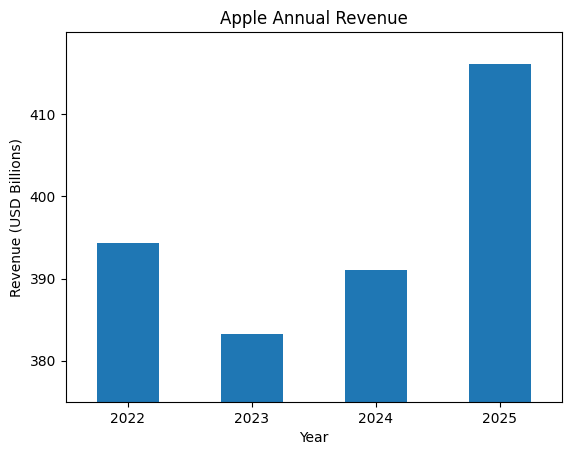

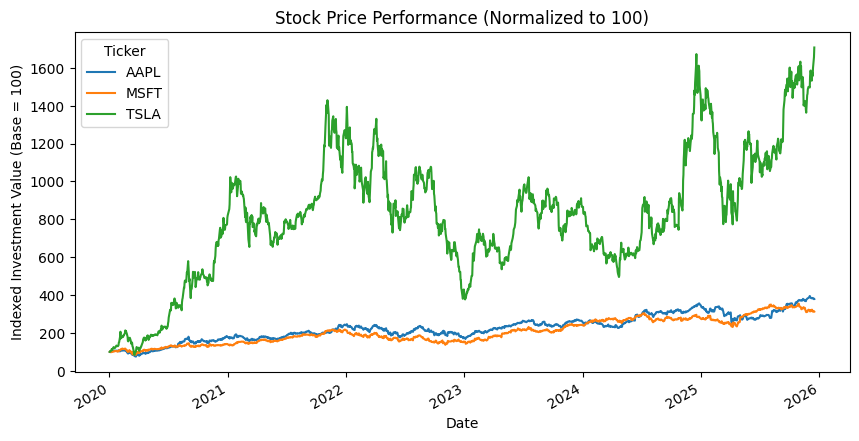

In [20]:
!pip install yfinance

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

tickers = ["AAPL", "MSFT", "TSLA"]
data = yf.download(tickers, start="2020-01-01", auto_adjust=True) #Downloads market data for each of those tickers from Jan 1, 2020.
close_prices = data["Close"]


aapl = yf.Ticker("AAPL")
income_stmt = aapl.financials
balance_sheet = aapl.balance_sheet
cash_flow = aapl.cashflow
income_stmt

rev = income_stmt.loc["Total Revenue"]
rev.index = rev.index.year
rev = rev.sort_index()
revenue_growth = rev.pct_change() #Grabs the total revenue row across all years/colums, calculates the percent change from one column to the next.
                                        #This line of code provides the revenue growth rates year-over-year.
revenue_growth

rev = rev.dropna() #This will only use valid years since yahoo finance sometimes does not include older fiscal years, that year will come in as NaN, Matplotlib tends to skip the bar

rev_billions = rev/1_000_000_000 #Conversion

rev_billions.plot(kind="bar") #Grabs the total revenue column and plots it as a bar chart
plt.title("Apple Annual Revenue")
plt.ylabel("Revenue (USD Billions)")
plt.xlabel("Year")
plt.xticks(rotation=0)

plt.ylim(375, 420)
plt.yticks(np.arange(380, 420, 10)) #Organizing y-axis

plt.show()

normalized_prices = close_prices / close_prices.iloc[0] * 100 #Stocks start at 100, relative performance is now shown
normalized_prices.plot(figsize=(10,5))
plt.title("Stock Price Performance (Normalized to 100)")
plt.ylabel("Indexed Investment Value (Base = 100)")
plt.show()

income_stmt.to_excel("apple_income_statement.xlsx")